<a href="https://colab.research.google.com/github/Rahul-Chouhan-407/Walmart_Capstone_Project/blob/main/Capstone_Project_Final_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Wallmart**



---



## **Problem Statement**

A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.


Dataset Information:
The walmart.csv contains 6435 rows and 8 columns.

1.   Using the above data, come up with useful insights that can be used by each of the stores to improve in various areas.

2.   Forecast the sales for each store for the next 12 weeks.

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Importing the Dataset**

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intellipaat Capstone Project - Walmart/Walmart.csv")

**Understanding the Dataset**

In [5]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [6]:
df.tail(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684
6429,45,21-09-2012,723086.20,0,65.32,4.038,191.856704,8.684
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
df.shape

(6435, 8)


## **Data Preprocessing and Cleaning**

**Checking for Missing Values**

In [10]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**Checking for Duplicates**

In [11]:
# Check for duplicates
duplicates = df.duplicated()
print(duplicates)
# Count the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool
Number of duplicates: 0


**Checking for Outliers**

In [14]:
# Calculate the first and third quartiles and IQR
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Set the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]

print(outliers)

# Count the number of outliers
count_outliers = len(outliers)

# Print the count of outliers
print("Count of Outliers:", count_outliers)


      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189       2  24-12-2010    3436007.68             0        49.97       2.886   
241       2  23-12-2011    3224369.80             0        46.66       3.112   
471       4  26-11-2010    2789469.45             1        48.08       2.752   
474       4  17-12-2010    2740057.14             0        46.57       2.884   
475       4  24-12-2010    3526713.39             0        43.21       2.887   
523       4  25-11-2011    3004702.33             1        47.96       3.225   
526       4  16-12-2011    2771397.17             0        36.44       3.149   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
761       6  24-12-2010    2727575.18             0        55.07       2.886   
1329     10  26-11-2010    2939946.38             1        55.33       3.162   
1332     10  17-12-2010    2811646.85             0        59.15       3.125   
1333     10  24-12-2010    3749057.69   

In [13]:
# Visualize the distribution and outliers
plt.figure(figsize=(10, 6))
plt.hist(df[variable_of_interest], bins=50, alpha=0.5, label='Data Distribution')
plt.scatter(outliers.index, outliers[variable_of_interest], color='red', label='Outliers')
plt.xlabel(variable_of_interest)
plt.ylabel('Frequency')
plt.title('Outlier Analysis')
plt.legend()
plt.show()

NameError: ignored

<Figure size 1000x600 with 0 Axes>

In [42]:
# Print the identified outliers
print("Identified Outliers:")
print(outliers)

Identified Outliers:
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189       2  24-12-2010    3436007.68             0        49.97       2.886   
241       2  23-12-2011    3224369.80             0        46.66       3.112   
471       4  26-11-2010    2789469.45             1        48.08       2.752   
475       4  24-12-2010    3526713.39             0        43.21       2.887   
523       4  25-11-2011    3004702.33             1        47.96       3.225   
526       4  16-12-2011    2771397.17             0        36.44       3.149   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
1329     10  26-11-2010    2939946.38             1        55.33       3.162   
1332     10  17-12-2010    2811646.85             0        59.15       3.125   
1333     10  24-12-2010    3749057.69             0        57.06       3.236   
1381     10  25-11-2011    2950198.64             1        60.68       3.760   
1385     10  23-12-

In [35]:
# Count the number of outliers
count_outliers = len(outliers)

# Print the count of outliers
print("Count of Outliers:", count_outliers)

Count of Outliers: 30


**Removing Outliers**

In [41]:
# Replace outliers with the median
median_value = data['value'].median()
data['value'] = np.where((data['value'] < lower_bound) | (data['value'] > upper_bound), median_value, data['value'])

print(data)







# Approach 4: Imputation (Replace with Median)
df_imputed = df.copy()
df_imputed.loc[np.abs(z_scores) > threshold, variable_of_interest] = df[variable_of_interest].median()

# Print the results for each approach
print("Outliers Imputed (Replaced with Median):")
print(df_imputed)

# Count the number of winsorized outliers
count_outliers = (df[variable_of_interest] != df_imputed[variable_of_interest]).sum()

# Print the count of imputed outliers
print("Count of Imputed Outliers:", count_outliers)

Outliers Imputed (Replaced with Median):
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

In [37]:
# Treat outliers using different approaches

# Approach 2: Winsorization
# winsorized_values = np.clip(df[variable_of_interest], df[variable_of_interest].quantile(0.05), df[variable_of_interest].quantile(0.95))
# df_winsorized = df.copy()
# df_winsorized[variable_of_interest] = winsorized_values

In [38]:
# print("Outliers Winsorized:")
# print(df_winsorized)
# print("-----------------------------")

In [39]:
# Count the number of winsorized outliers
# count_outliers = (df[variable_of_interest] != df_winsorized[variable_of_interest]).sum()

# Print the count of winsorized outliers
# print("Count of Winsorized Outliers:", count_outliers)


## **Exploratory Data Analysis**

In [44]:
df_imputed.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [45]:
# Select the variable of interest for outlier analysis (e.g., Weekly_Sales)
variable_of_interest = 'Weekly_Sales'

In [46]:
# Calculate z-scores for the selected variable
z_scores = (df_imputed[variable_of_interest] - df_imputed[variable_of_interest].mean()) / df_imputed[variable_of_interest].std()

In [47]:
# Define a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
threshold = 3

In [48]:
# Identify outliers based on the threshold
outliers = df_imputed[np.abs(z_scores) > threshold]

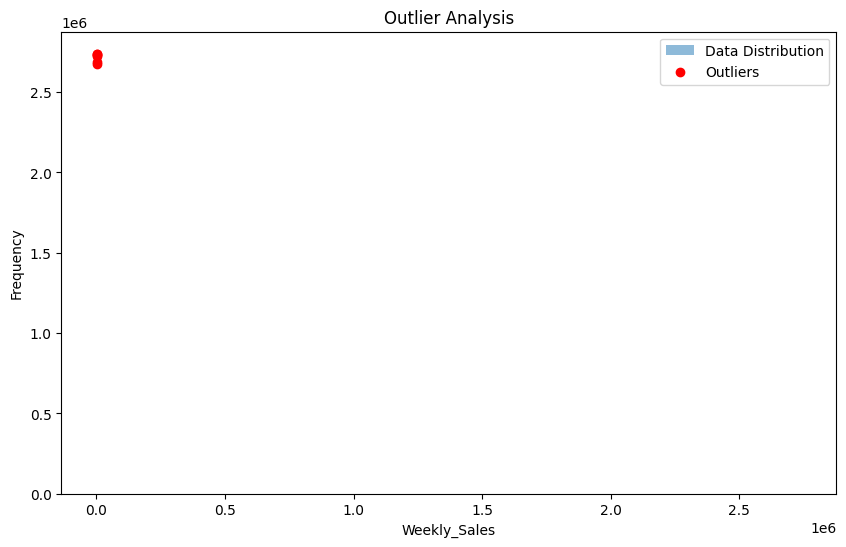

In [49]:
# Visualize the distribution and outliers
plt.figure(figsize=(10, 6))
plt.hist(df_imputed[variable_of_interest], bins=50, alpha=0.5, label='Data Distribution')
plt.scatter(outliers.index, outliers[variable_of_interest], color='red', label='Outliers')
plt.xlabel(variable_of_interest)
plt.ylabel('Frequency')
plt.title('Outlier Analysis')
plt.legend()
plt.show()

In [50]:
# Print the identified outliers
print("Identified Outliers:")
print(outliers)

Identified Outliers:
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
474       4  17-12-2010    2740057.14             0        46.57       2.884   
761       6  24-12-2010    2727575.18             0        55.07       2.886   
1953     14  25-11-2011    2685351.81             1        48.71       3.492   
2620     19  24-12-2010    2678206.42             0        26.05       3.309   
3192     23  24-12-2010    2734277.10             0        22.96       3.150   
3816     27  23-12-2011    2739019.75             0        41.59       3.587   

             CPI  Unemployment  
474   126.879484         7.127  
761   212.916508         7.007  
1953  188.350400         8.523  
2620  132.747742         8.067  
3192  132.747742         5.287  
3816  140.528765         7.906  
